# Introduction to neural network classification with Tensorflow
* Binary classification
* Multiclass classification
* Multilabel classification

## Typical architecture of a classification neural network

The word *typical* is on purpose.

Because the architecture of a classification neural network can widely vary depending on the problem you're working on.

However, there are some fundamentals all deep neural networks contain:
* An input layer.
* Some hidden layers.
* An output layer.

Much of the rest is up to the data analyst creating the model.

The following are some standard values you'll often use in your classification neural networks.

| **Hyperparameter** | **Binary Classification** | **Multiclass classification** |
| --- | --- | --- |
| Input layer shape | Same as number of features (e.g. 5 for age, sex, height, weight, smoking status in heart disease prediction) | Same as binary classification |
| Hidden layer(s) | Problem specific, minimum = 1, maximum = unlimited | Same as binary classification |
| Neurons per hidden layer | Problem specific, generally 10 to 100 | Same as binary classification |
| Output layer shape | 1 (one class or the other) | 1 per class (e.g. 3 for food, person or dog photo) |
| Hidden activation | Usually [ReLU](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) (rectified linear unit) | Same as binary classification |
| Output activation | [Sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function) | [Softmax](https://en.wikipedia.org/wiki/Softmax_function) |
| Loss function | [Cross entropy](https://en.wikipedia.org/wiki/Cross_entropy#Cross-entropy_loss_function_and_logistic_regression) ([`tf.keras.losses.BinaryCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/BinaryCrossentropy) in TensorFlow) | Cross entropy ([`tf.keras.losses.CategoricalCrossentropy`](https://www.tensorflow.org/api_docs/python/tf/keras/losses/CategoricalCrossentropy) in TensorFlow) |
| Optimizer | [SGD](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/SGD) (stochastic gradient descent), [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) | Same as binary classification |

Table 1: Typical architecture of a classification network. Source: Adapted from page 295 of [Hands-On Machine Learning with Scikit-Learn, Keras & TensorFlow Book by Aurélien Géron](https://www.oreilly.com/library/view/hands-on-machine-learning/9781492032632/)

Don't worry if not much of the above makes sense right now, we'll get plenty of experience as we go through this notebook.

Let's start by importing TensorFlow as the common alias `tf`. For this notebook, make sure you're using version 2.x+.

# Create data to view and fit

In [ ]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X,y = make_circles(n_samples, noise= 0.03, random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
import pandas as pd
circles = pd.DataFrame({'X0': X[:,0], 'X1': X[:,1] })

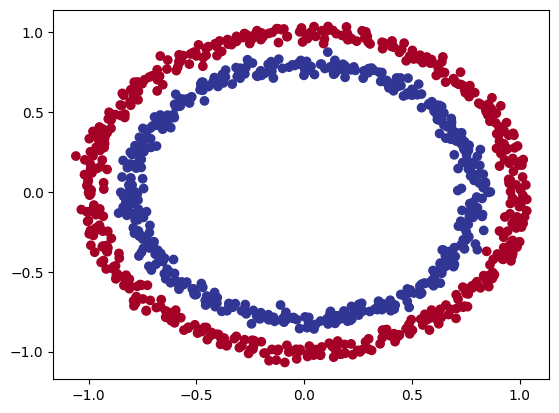

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1], c= y, cmap = plt.cm.RdYlBu);

## Input and output shapes

In [ ]:
# Check the shape of our features and labels
X.shape, y.shape

((1000, 2), (1000,))

In [ ]:
# How many samples we're working
len(X), len(y)

(1000, 1000)

In [ ]:
# View the first example of features and labels
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling
The steps in modelling with tensorflow:
1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate...

In [ ]:
import tensorflow as tf
tf.__version__

'2.15.0'

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                metrics= ["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs = 5 )

Epoch 1/5
32/32 [==============================] - 1s 3ms/step - loss: 6.1528 - accuracy: 0.4780
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.0660 - accuracy: 0.4870
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.8107 - accuracy: 0.4980
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.8644 - accuracy: 0.4970
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 3.5588 - accuracy: 0.5160


In [ ]:
# Let's try and improve our model by training for longer
model_1.fit(X,y , epochs = 200, verbose =  0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy.

In [ ]:
# Set the random seed
tf.random.set_seed(42)

#1. Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2.Compile the model
model_2.compile( loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.SGD(),
                 metrics = ['accuracy'])

#4. Fit the model
model_2.fit(X,y, epochs = 100, verbose = 0)
model_2.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 7.7125 - accuracy: 0.5000


[7.712474346160889, 0.5]

## Improving our model
Let's look into our bag of tricks to see how we can improve our model.
1. Create a model - We might want to add more layers or increase the number of hidden units within a layer
2. Compiling a model - Use another optimization function
3. Fitting a model - Fit the model for more epochs

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # 100 dense neurons
    tf.keras.layers.Dense(10), # add another layer with 10 neurons
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])
#3 . Fit the model
model_3.fit(X,y, epochs = 100, verbose = 0 )

In [ ]:
model_3.evaluate(X,y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6982 - accuracy: 0.5100


[0.6982315182685852, 0.5099999904632568]

To visualize our model prediction, let's create a function `plot_decision_boundary`.
* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Plot the predictions as well as the line between zones (where each class falls)

In [ ]:
import numpy as np

In [ ]:
def plot_decision_boundary(model, X,y ):

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:,0].min() -0.1, X[:,0].max() + 0.1
  y_min, y_max = X[:,1].min() -0.1, X[:,1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                             np.linspace(y_min, y_max, 100))

  # Create X value
  x_in = np.c_[xx.ravel(), yy.ravel()] # Stack 2D arrays together

  # Make predictions
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('doing multiclass classfication')
    y_pred = np.argmax(y_pred, axis = 1).reshape(xx.shape)
  else:
    print('doing binary classification')
    y_pred = np.round(y_pred).reshape(xx.shape)

  # plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap = plt.cm.RdYlBu, alpha = 0.7)
  plt.scatter(X[:,0], X[:,1], c=y, s= 40, cmap =plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

313/313 [==============================] - 1s 2ms/step
doing binary classification


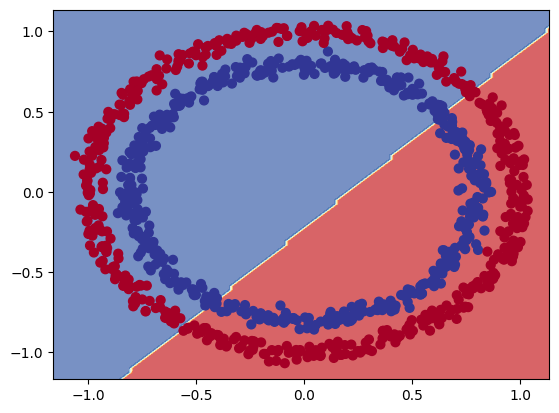

In [ ]:
# Check out the pred our model is making
plot_decision_boundary(model = model_3, X= X, y= y)

We compiled our model for a binary classification problem. But we are working on a regression problem. Let's change our model

In [ ]:
# Let's see if our model can be used for a regression problem
tf.random.set_seed(42)

# Create some regression data
X_regression = tf.range(0,1000,5)
y_regression = tf.range(100, 1100, 5) # y = x + 10

# split our regression data into training and test set
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the regression data
model_3.fit(tf.expand_dims(X_reg_train, axis =1), y_reg_train, epochs = 100)

Epoch 1/100


ValueError: in user code:

    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1401, in train_function  *
        return step_function(self, iterator)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1384, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1373, in run_step  **
        outputs = model.train_step(data)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py", line 1150, in train_step
        y_pred = self(x, training=True)
    File "/usr/local/lib/python3.10/dist-packages/keras/src/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/usr/local/lib/python3.10/dist-packages/keras/src/engine/input_spec.py", line 280, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer 'sequential_3' (type Sequential).
    
    Input 0 of layer "dense_7" is incompatible with the layer: expected axis -1 of input shape to have value 2, but received input with shape (None, 1)
    
    Call arguments received by layer 'sequential_3' (type Sequential):
      • inputs=tf.Tensor(shape=(None, 1), dtype=int32)
      • training=True
      • mask=None


We compiled our model for a binary classification problem. But we are working on a regression problem. Let's change our model

In [ ]:
# setup random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss = tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ['mae'])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_reg_train, axis = 1), y_reg_train, epochs= 100)

Epoch 1/100
5/5 [==============================] - 2s 10ms/step - loss: 497.2635 - mae: 497.2635
Epoch 2/100
5/5 [==============================] - 0s 5ms/step - loss: 379.3532 - mae: 379.3532
Epoch 3/100
5/5 [==============================] - 0s 5ms/step - loss: 266.3776 - mae: 266.3776
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 149.6632 - mae: 149.6632
Epoch 5/100
5/5 [==============================] - 0s 6ms/step - loss: 52.9283 - mae: 52.9283
Epoch 6/100
5/5 [==============================] - 0s 5ms/step - loss: 84.9842 - mae: 84.9842
Epoch 7/100
5/5 [==============================] - 0s 5ms/step - loss: 82.6338 - mae: 82.6338
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 50.9015 - mae: 50.9015
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 49.1511 - mae: 49.1511
Epoch 10/100
5/5 [==============================] - 0s 6ms/step - loss: 47.4546 - mae: 47.4546
Epoch 11/100
5/5 [==============================] 

2/2 [==============================] - 0s 10ms/step


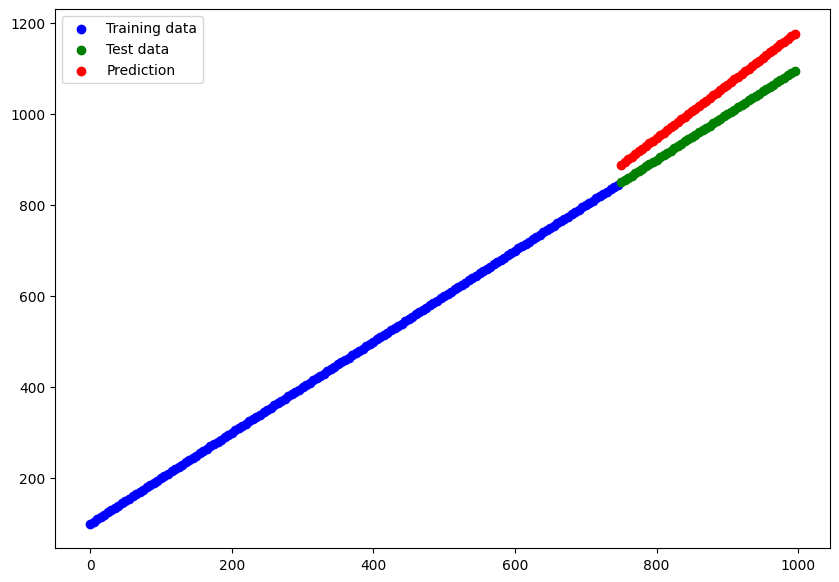

In [ ]:
y_reg_preds = model_3.predict(X_reg_test)

# plot the model's prediction againts our regression data
plt.figure(figsize = (10,7))
plt.scatter(X_reg_train, y_reg_train, c= 'b', label = "Training data")
plt.scatter(X_reg_test, y_reg_test, c= 'g', label = 'Test data')
plt.scatter(X_reg_test, y_reg_preds , c = 'r', label = 'Prediction')
plt.legend()

## The missing piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation = tf.keras.activations.linear)
])

#2. Compile the model
model_4.compile(loss ='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(lr =0.001),
                metrics = ['accuracy'])

#3. Fit the model
history = model_4.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 2s 14ms/step - loss: 6.1268 - accuracy: 0.4910
Epoch 2/100
32/32 [==============================] - 0s 13ms/step - loss: 6.1212 - accuracy: 0.4920
Epoch 3/100
32/32 [==============================] - 0s 12ms/step - loss: 6.0923 - accuracy: 0.4910
Epoch 4/100
32/32 [==============================] - 0s 11ms/step - loss: 6.0729 - accuracy: 0.4900
Epoch 5/100
32/32 [==============================] - 0s 14ms/step - loss: 6.0719 - accuracy: 0.4900
Epoch 6/100
32/32 [==============================] - 0s 10ms/step - loss: 6.0711 - accuracy: 0.4900
Epoch 7/100
32/32 [==============================] - 0s 10ms/step - loss: 6.0702 - accuracy: 0.4900
Epoch 8/100
32/32 [==============================] - 0s 14ms/step - loss: 6.0695 - accuracy: 0.4900
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 6.0687 - accuracy: 0.4900
Epoch 10/100
32/32 [==============================] - 0s 7ms/step - loss: 6.0678 - accuracy: 0.4900
E

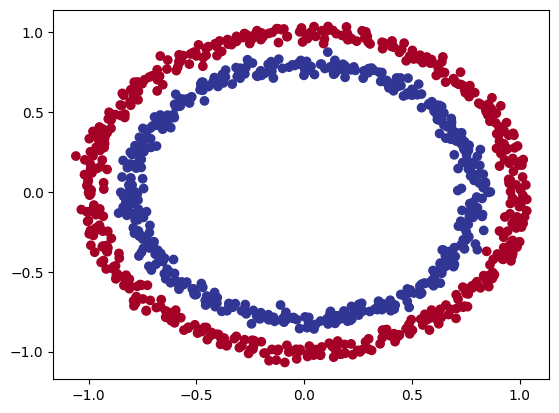

In [ ]:
# Check out our data
plt.scatter(X[:,0], X[:,1], c= y , cmap = plt.cm.RdYlBu)

313/313 [==============================] - 1s 2ms/step
doing binary classification


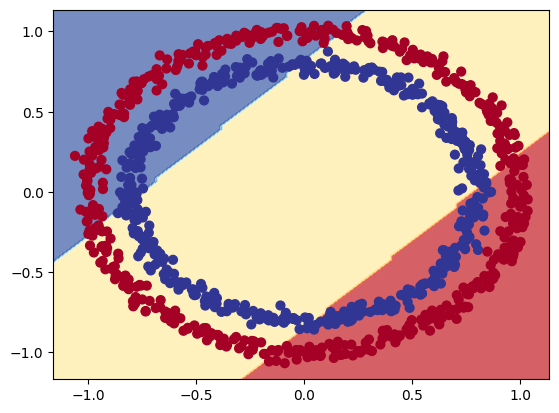

In [ ]:
# Check the decision boundary of our latest model
plot_decision_boundary(model = model_4,
                       X = X,
                       y= y)

In [ ]:
tf.random.set_seed(42)

# 1. Build the model
model_5 =tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')

])

# 2. Compile the model
model_5.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# 3. Fit the model
model_5.fit(X,y, epochs = 100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.6936 - accuracy: 0.5050
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6909 - accuracy: 0.5110
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6890 - accuracy: 0.5090
Epoch 4/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5170
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6869 - accuracy: 0.5190
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6860 - accuracy: 0.5150
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6853 - accuracy: 0.5210
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6846 - accuracy: 0.5210
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6839 - accuracy: 0.5220
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6834 - accuracy: 0.5190
Epoch 11/

313/313 [==============================] - 1s 2ms/step
doing binary classification


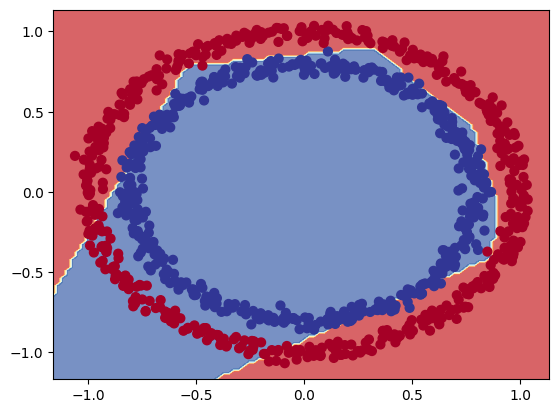

In [ ]:
plot_decision_boundary(model = model_5, X=X, y=y)

The thing we are doing wrong is that we fit the model on the whole dataset. We should divide our dataset into training set and test set

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((800, 2), (800,), (200, 2), (200,))

In [ ]:
tf.random.set_seed(42)

#1.Build the model
model_6 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# 2.Compile the model
model_6.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                optimizer = tf.keras.optimizers.Adam(lr = 0.001),
                metrics = ['accuracy'])

# Fit the model
history = model_6.fit(X_train, y_train, epochs = 500, verbose = 0)

313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 1s 2ms/step
doing binary classification


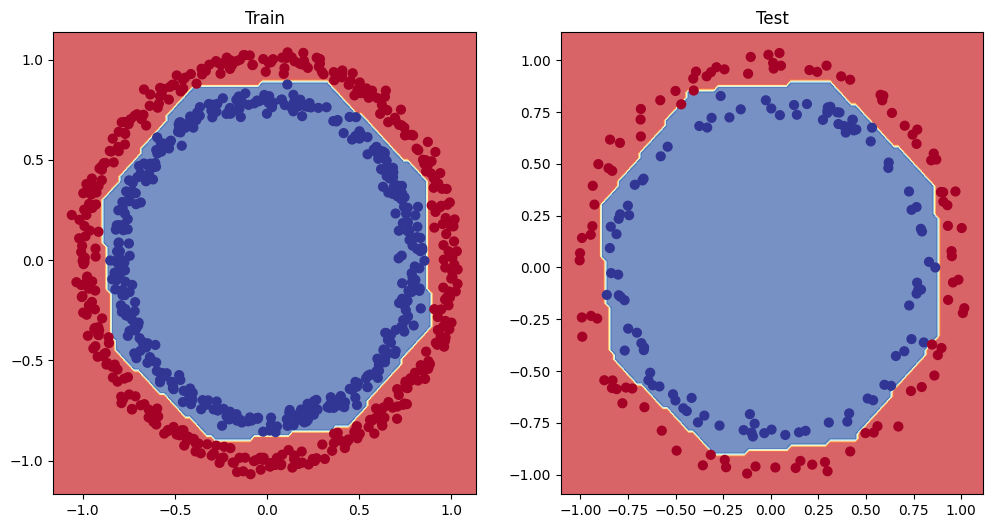

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model = model_6, X= X_train, y=y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = model_6, X = X_test, y = y_test)


## Plot the loss curves

In [ ]:
# Convert the history object to a Dataframe
history_df = pd.DataFrame(history.history)

Text(0.5, 1.0, 'Model_6_loss curves')

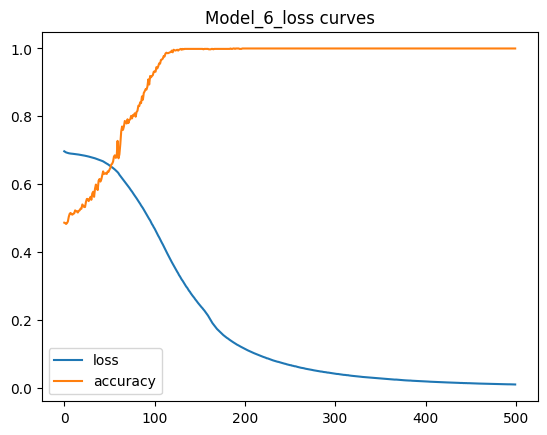

In [ ]:
history_df.plot()
plt.title('Model_6_loss curves')

## Finding the best learning rate
To find the best ideal learning ratet, we are going to use the following steps:
* A learning rate **callback**
* Another model

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
tf.random.set_seed(42)

# Create model
model_7= tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_7.compile(loss = 'binary_crossentropy',
                optimizer = 'adam',
                metrics = ["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model
history_7 = model_7.fit(X_train,
                        y_train,
                        epochs =100,
                        callbacks = [lr_scheduler])

Epoch 1/100
25/25 [==============================] - 1s 2ms/step - loss: 0.7099 - accuracy: 0.5025 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7094 - accuracy: 0.5000 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7088 - accuracy: 0.5000 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7082 - accuracy: 0.5000 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7077 - accuracy: 0.5025 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7070 - accuracy: 0.4975 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7063 - accuracy: 0.4950 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 2ms/step - loss: 0.7057 - accuracy: 0.4963 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 2ms/step - loss:

<Axes: xlabel='epochs'>

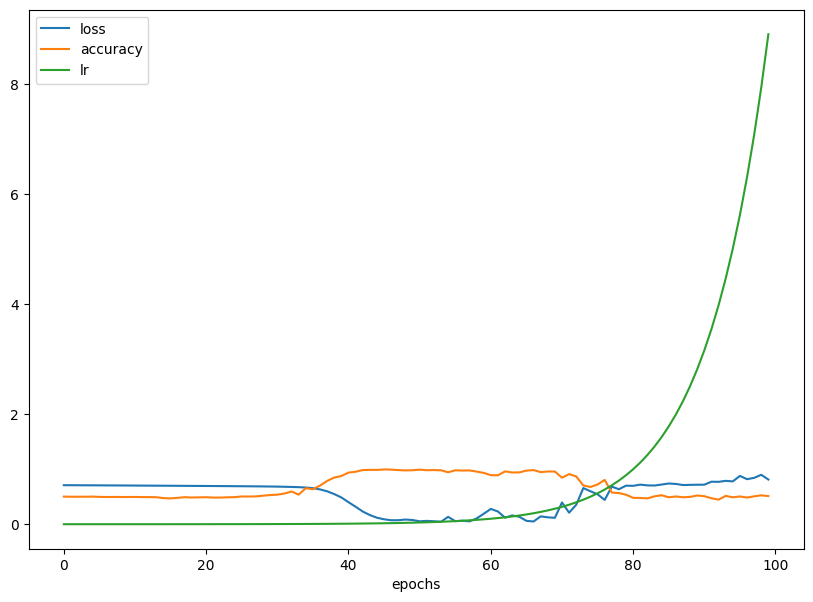

In [ ]:
# Checkout the history
pd.DataFrame(history_7.history).plot(figsize = (10,7), xlabel='epochs')

Text(0.5, 1.0, 'Learning Rate vs loss')

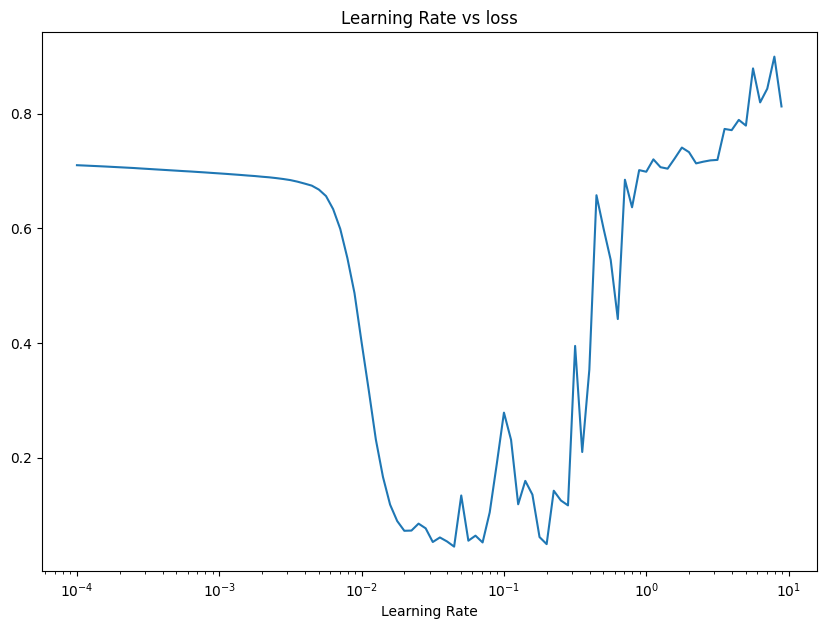

In [ ]:
# Plot the learning rate versus the loss
lrs = 1e-4 * 10 **(tf.range(100)/20)
plt.figure(figsize = (10,7))
plt.semilogx(lrs, history_7.history["loss"])
plt.xlabel("Learning Rate")
plt.title('Learning Rate vs loss')

In [ ]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [ ]:
# Let's try using a higher ideal learning rate with the same model
tf.random.set_seed(42)

# Create the model
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
model_8.compile(loss = 'binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate = 0.02),
                metrics = ['accuracy'])

# Fit the model
history_8 = model_8.fit(X_train, y_train, epochs = 20)

Epoch 1/20
25/25 [==============================] - 2s 4ms/step - loss: 0.6812 - accuracy: 0.5700
Epoch 2/20
25/25 [==============================] - 0s 4ms/step - loss: 0.6679 - accuracy: 0.5838
Epoch 3/20
25/25 [==============================] - 0s 5ms/step - loss: 0.6412 - accuracy: 0.6237
Epoch 4/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5947 - accuracy: 0.6950
Epoch 5/20
25/25 [==============================] - 0s 4ms/step - loss: 0.5074 - accuracy: 0.8350
Epoch 6/20
25/25 [==============================] - 0s 3ms/step - loss: 0.4202 - accuracy: 0.8737
Epoch 7/20
25/25 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.9750
Epoch 8/20
25/25 [==============================] - 0s 3ms/step - loss: 0.1958 - accuracy: 0.9900
Epoch 9/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1348 - accuracy: 0.9875
Epoch 10/20
25/25 [==============================] - 0s 4ms/step - loss: 0.1096 - accuracy: 0.9837
Epoch 11/20
25/25 [

In [ ]:
# Evaluate model 8 on the test dataset
model_8.evaluate (X_test, y_test)

7/7 [==============================] - 1s 7ms/step - loss: 0.0678 - accuracy: 0.9850


[0.0678078681230545, 0.9850000143051147]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 4ms/step
doing binary classification


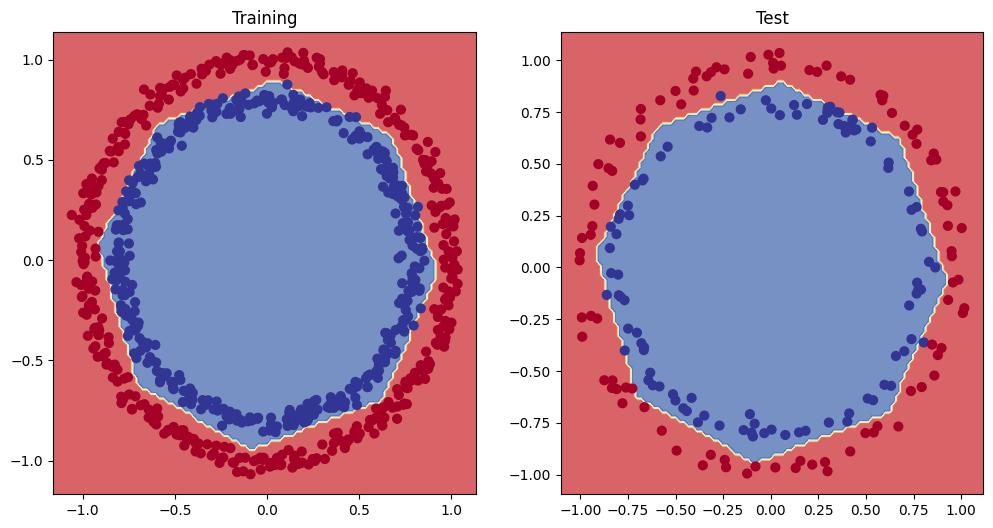

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model = model_8, X = X_train, y = y_train)

plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model = model_8, X = X_test, y = y_test)

## More classification evaluation methods

Alongside visualiing results as much as possible, there are a handful of other classification evaluation methods and metrics you should be familiar with:
* Accuracy
* Precision
* Recall
* F1-score
* Confusion matrix
* Classification report


In [ ]:
# Check the accuracy of our model
loss, accuracy = model_8.evaluate(X_test, y_test)
loss, accuracy

7/7 [==============================] - 0s 5ms/step - loss: 0.0678 - accuracy: 0.9850


(0.0678078681230545, 0.9850000143051147)

How about a confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix

y_preds = model_8.predict(X_test)
confusion_matrix (y_test,tf.round(y_preds))

7/7 [==============================] - 0s 5ms/step


array([[100,   0],
       [  3,  97]])

How about we prettify our confusion matrix?

In [ ]:
import itertools
from sklearn.metrics import confusion_matrix
figsize = (10,10)
def make_confusion_matrix(y_true, y_pred, classes = None, figsize =(10,10), text_size = 15):
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis = 1)[:, np.newaxis] # normalize our confusion matrix
  n_classes = cm.shape[0]

  # Let's prettify it
  fig ,ax = plt.subplots(figsize =figsize)

  # Create matrix plot
  cax = ax.matshow(cm, cmap = plt.cm.Blues)
  fig.colorbar(cax)

  # Set labels to classes
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])

  # Label the axes
  ax.set(title = 'Confusion matrix',
        xlabel = 'Predicted label',
        ylabel = 'True label',
        xticks = np.arange(n_classes),
        yticks = np.arange(n_classes),
        xticklabels = labels,
        yticklabels = labels)

  # Set x-axis labels to bottom
  ax.xaxis.set_label_position("bottom")
  ax.xaxis.tick_bottom()

  # Adjusted label
  ax.yaxis.label.set_size(text_size)
  ax.xaxis.label.set_size(text_size)
  ax.title.set_size(20)


  # Set threshold for different colors
  threshold = (cm.max() + cm.min()) // 2

  # Plot the text on each cell
  for i,j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j,i,f"{cm[i, j]} ({cm_norm[i,j]*100:1f}%)",
    horizontalalignment = "center",
    color = "white" if cm[i,j] > threshold else "black",
    size = 15)

## working a larger example (multi classification)

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
# Show the first training example
print(f"training sample:\n{train_data[0]}\n")
print(f"training label:\n{train_labels[0]}")

training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [ ]:
# Check the shape of a single example
train_data[0].shape, train_labels.shape

((28, 28), (60000,))

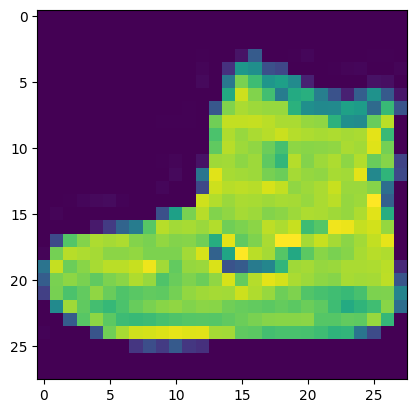

In [ ]:
# Plot a singl sample
import matplotlib.pyplot as plt
plt.imshow(train_data[0])

In [ ]:
# Create a small list so we can index onto our training labels into human readable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

In [ ]:

# Plot an example image and its label
index_of_choice = np.random.randint(0,len(train_labels))
plt.imshow(train_data[index_of_choice], cmap = plt.cm.binary)
plt.title(class_names[train_labels[index_of_choice]])

NameError: name 'np' is not defined

## Build a multiclass classification model
For our multi-class classification model, we can use a similar to our binary classification. However, we have to change a few things:
* Input shape = 28x28 (the shape of one img)
* Output shape = 10 (one per class of clothing)
* Loss function= tf.keras.losses.CategoricalCrossentropy()
  * If your label is one-hot encoded: use CategoricalCrossentropy
  * else use SparseCategoricalCrossentropy
* Output layer activation = Softmax (not sigmoid)


In [ ]:
pd.Series(train_labels).value_counts()

9    6000
0    6000
3    6000
2    6000
7    6000
5    6000
1    6000
6    6000
4    6000
8    6000
dtype: int64

=> Class is balanced

In [ ]:
# our data needs to be flattened from 28*28 to (,784)
flatten_model = tf.keras.Sequential(
    [tf.keras.layers.Flatten(input_shape = (28,28))]
)
flatten_model.output_shape

(None, 784)

In [ ]:
train_labels[:10]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

CategoricalCrossEntropy expects labels to be one-hot encoded
=> Use SparseCategoricalCrossentropy

In [ ]:
tf.random.set_seed(42)

# Build the model
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer = tf.keras.optimizers.Adam(lr = 0.01),
              metrics = ['accuracy'])

# Fit the model
non_norm_history = model.fit(train_data, train_labels, epochs = 100, validation_data = (test_data, test_labels))

# FOR CategoricalCrossentropy() use tf.one_hot()
# non_norm_history = model.fit(train_data, tf.one_hot(train_labels), epochs = 100, validation_data = (test_data, tf.one_hot(test_labels)))

Epoch 1/100
1875/1875 [==============================] - 9s 4ms/step - loss: 2.4117 - accuracy: 0.0971 - val_loss: 2.2554 - val_accuracy: 0.1001
Epoch 2/100
1875/1875 [==============================] - 10s 6ms/step - loss: 2.1879 - accuracy: 0.1912 - val_loss: 2.0984 - val_accuracy: 0.1988
Epoch 3/100
1875/1875 [==============================] - 10s 6ms/step - loss: 1.9667 - accuracy: 0.1991 - val_loss: 1.8392 - val_accuracy: 0.2000
Epoch 4/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7913 - accuracy: 0.2006 - val_loss: 1.7568 - val_accuracy: 0.2001
Epoch 5/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7508 - accuracy: 0.1993 - val_loss: 1.7620 - val_accuracy: 0.1999
Epoch 6/100
1875/1875 [==============================] - 7s 4ms/step - loss: 1.7364 - accuracy: 0.1991 - val_loss: 1.7262 - val_accuracy: 0.2000
Epoch 7/100
1875/1875 [==============================] - 6s 3ms/step - loss: 1.7285 - accuracy: 0.1992 - val_loss: 1.7184 - val_

In [ ]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

## Build the model with callbacks and scaled data

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0

In [ ]:
tf.random.set_seed(42)

# Build the model
last_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

# Compile the model
last_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                   optimizer = tf.keras.optimizers.Adam(),
                   metrics = ["accuracy"])

# Define the callback function
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model
last_history = last_model.fit(train_data_norm, train_labels, epochs = 40,
                              validation_data = (test_data_norm, test_labels),
                              callbacks =[lr_scheduler])

Epoch 1/40
1875/1875 [==============================] - 11s 5ms/step - loss: 1.7847 - accuracy: 0.2315 - val_loss: 1.6554 - val_accuracy: 0.3091 - lr: 0.0010
Epoch 2/40
1875/1875 [==============================] - 9s 5ms/step - loss: 1.5989 - accuracy: 0.3178 - val_loss: 1.5491 - val_accuracy: 0.3638 - lr: 0.0011
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.5087 - accuracy: 0.3691 - val_loss: 1.4699 - val_accuracy: 0.3924 - lr: 0.0013
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.4419 - accuracy: 0.3921 - val_loss: 1.4143 - val_accuracy: 0.4056 - lr: 0.0014
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.3654 - accuracy: 0.4443 - val_loss: 1.2773 - val_accuracy: 0.5156 - lr: 0.0016
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 1.2112 - accuracy: 0.5680 - val_loss: 1.1603 - val_accuracy: 0.6040 - lr: 0.0018
Epoch 7/40
1875/1875 [==============================] - 6

In [ ]:
last_history['Loss']

TypeError: 'History' object is not subscriptable

Text(0.5, 1.0, 'finding the ideal learning rate')

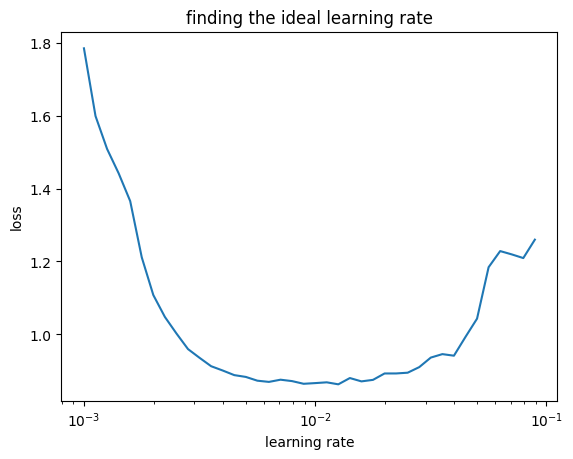

In [ ]:
# Plot the learning rate decay curve
import numpy as np
import matplotlib.pyplot as plt

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, last_history.history['loss'])
plt.xlabel("learning rate")
plt.ylabel('loss')
plt.title('finding the ideal learning rate')

In [ ]:
# Let's refit the model with the ideal learning rate
tf.random.set_seed(42)

# Build the model
final_model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape = (28,28)),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax')
])

# Compile the model
final_model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                    optimizer = tf.keras.optimizers.Adam(lr = 0.005),
                    metrics = ["accuracy"])

# Fit the model
final_history = final_model.fit(train_data_norm, train_labels, epochs = 40,
                validation_data = (test_data_norm, test_labels))

Epoch 1/40
1875/1875 [==============================] - 9s 4ms/step - loss: 1.3443 - accuracy: 0.5255 - val_loss: 0.8997 - val_accuracy: 0.7161
Epoch 2/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.7691 - accuracy: 0.7599 - val_loss: 0.7022 - val_accuracy: 0.7760
Epoch 3/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6273 - accuracy: 0.7979 - val_loss: 0.6208 - val_accuracy: 0.7938
Epoch 4/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5800 - accuracy: 0.8064 - val_loss: 0.5971 - val_accuracy: 0.8007
Epoch 5/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5602 - accuracy: 0.8096 - val_loss: 0.5776 - val_accuracy: 0.8069
Epoch 6/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5458 - accuracy: 0.8138 - val_loss: 0.5813 - val_accuracy: 0.8051
Epoch 7/40
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5357 - accuracy: 0.8159 - val_loss: 0.6047 - val_accuracy:

## Evaluating our multi-class classification model

In [ ]:
# Make predictions for our model
y_probs = final_model.predict(test_data_norm)

# View the fist 5 predictions
y_probs[:5]

313/313 [==============================] - 1s 3ms/step


array([[2.12267182e-09, 2.10748349e-20, 6.44668485e-11, 2.20254691e-07,
        2.68240598e-07, 4.54695195e-01, 6.98387339e-08, 5.25024273e-02,
        1.12031144e-03, 4.91681397e-01],
       [2.32519116e-04, 1.46658317e-06, 9.59894717e-01, 1.30017712e-08,
        1.58561412e-02, 2.67523105e-22, 2.40142737e-02, 3.74465701e-33,
        8.93695017e-07, 0.00000000e+00],
       [1.83486986e-08, 9.99738991e-01, 1.60067095e-04, 1.31353490e-05,
        8.74382749e-05, 1.14948664e-14, 3.60743712e-07, 8.02508723e-20,
        2.38540732e-11, 1.52780736e-16],
       [6.45632028e-08, 9.99644160e-01, 1.48416788e-04, 8.65639740e-05,
        1.20018274e-04, 1.05968977e-12, 6.57077862e-07, 9.29888453e-17,
        1.45839424e-10, 1.64381014e-13],
       [1.88097388e-01, 1.64720276e-03, 3.31788689e-01, 1.89126208e-02,
        3.76384780e-02, 8.93320475e-08, 4.20923978e-01, 6.00596309e-12,
        9.91580775e-04, 1.87608756e-15]], dtype=float32)

In [ ]:
y_probs[0], tf.argmax(y_probs[0]),class_names[tf.argmax(y_probs[0])]

(array([2.1226718e-09, 2.1074835e-20, 6.4466849e-11, 2.2025469e-07,
        2.6824060e-07, 4.5469519e-01, 6.9838734e-08, 5.2502427e-02,
        1.1203114e-03, 4.9168140e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>,
 'Ankle boot')

In [ ]:
y_preds = y_probs.argmax(axis = 1)
y_preds[:5]

array([9, 2, 1, 1, 6])

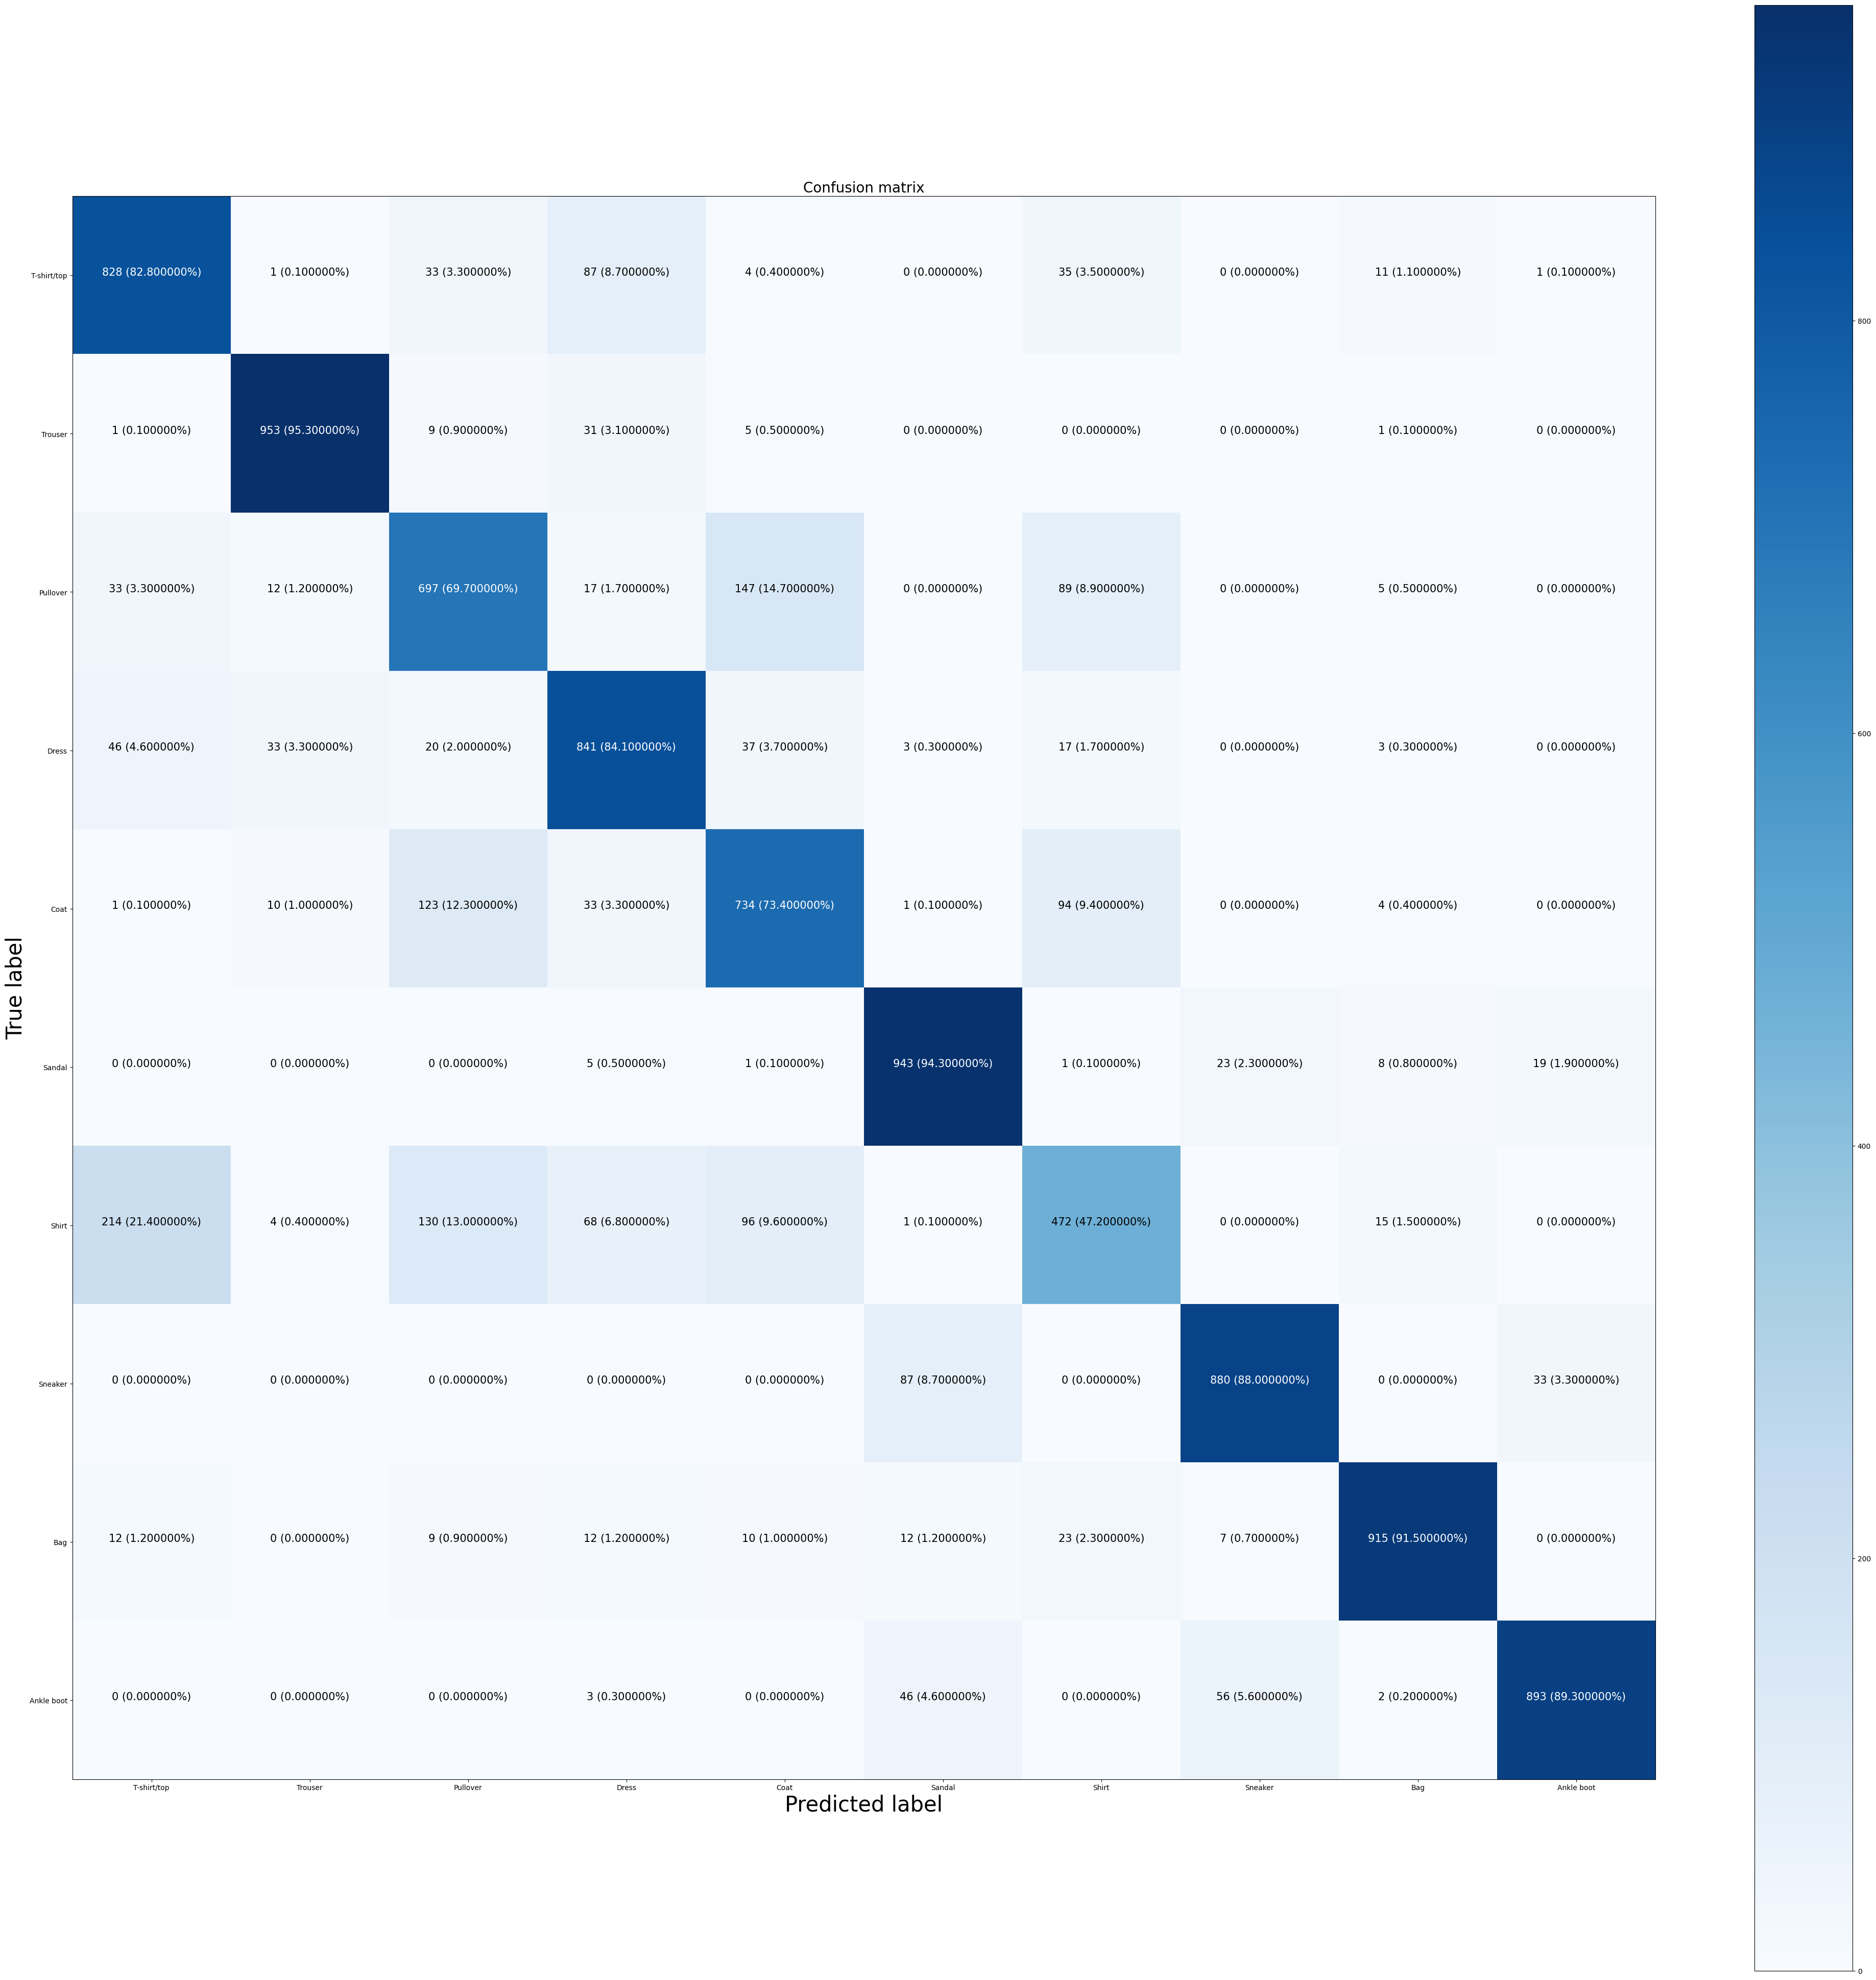

In [ ]:
make_confusion_matrix(test_labels, y_preds, classes = class_names, figsize =(50,50), text_size = 30)


## Visualize random prediction

In [ ]:
import random
def plot_random_image(model , images, true_labels, classes):

  i = random.randint(0, len(images))

  target_image = images[i]
  pred_probs = model.predict(target_image.reshape(1,28,28))
  pred_label = classes[pred_probs.argmax()]
  true_label = classes[true_labels[i]]

  plt.imshow(target_image, cmap = plt.cm.binary)

  if pred_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel("Pred {} {:2.0f}% (True:{})".format(pred_label,
                                                 100*tf.reduce_max(pred_probs),
                                                 true_label),
             color = color)

1/1 [==============================] - 0s 18ms/step


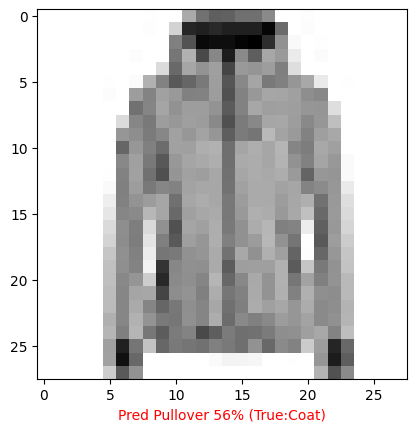

In [ ]:
plot_random_image(model = final_model,  images = test_data_norm, true_labels = test_labels, classes = class_names)

## What patterns is our model learning

In [ ]:
# Find the layers of our most recent model
final_model.layers

In [ ]:
# Extract a particular layer
final_model.layers[1]

In [ ]:
# Get the patterns of a layer in our network
w, b = final_model.layers[1].get_weights()
w.shape, b.shape

((784, 4), (4,))

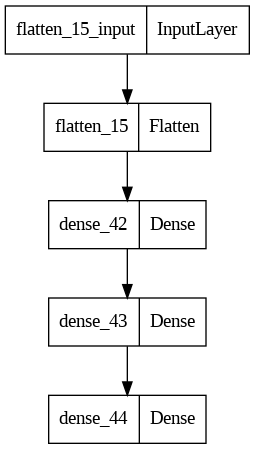

In [ ]:
tf.keras.utils.plot_model(final_model)

## Exercise

In [ ]:
from sklearn.datasets import make_moons
X, y = make_moons(1000)

In [ ]:
X.shape, y.shape

((1000, 2), (1000,))

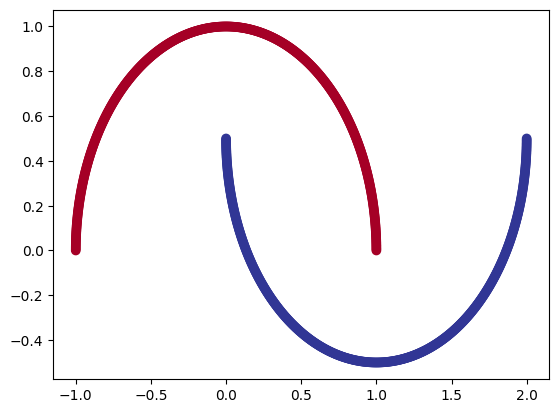

In [ ]:
plt.scatter(X[:,0], X[:,1], c=y , cmap = plt.cm.RdYlBu )

In [ ]:
X.min(), X.max()

(-1.0, 2.0)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size = 0.2, random_state = 42)

In [ ]:
(X_train.shape, y_train.shape),(X_test.shape, y_test.shape)

(((800, 2), (800,)), ((200, 2), (200,)))

In [ ]:
pd.Series(y).value_counts()

0    500
1    500
dtype: int64

In [ ]:
tf.random.set_seed(42)

# Build the model
ex_model = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(4, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
ex_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(),
                 metrics = ['accuracy'])

# Schedule the learning rate
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))
# Fit the model
ex_history = ex_model.fit(X_train, y_train, epochs = 25,  validation_data = (X_test, y_test),
             callbacks = [lr_scheduler])

Epoch 1/25
25/25 [==============================] - 2s 19ms/step - loss: 0.5788 - accuracy: 0.8350 - val_loss: 0.5422 - val_accuracy: 0.8950 - lr: 0.0010
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 0.5548 - accuracy: 0.8163 - val_loss: 0.5127 - val_accuracy: 0.8900 - lr: 0.0011
Epoch 3/25
25/25 [==============================] - 0s 8ms/step - loss: 0.5289 - accuracy: 0.8112 - val_loss: 0.4794 - val_accuracy: 0.8900 - lr: 0.0013
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4997 - accuracy: 0.8125 - val_loss: 0.4422 - val_accuracy: 0.8850 - lr: 0.0014
Epoch 5/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4674 - accuracy: 0.8175 - val_loss: 0.4008 - val_accuracy: 0.8750 - lr: 0.0016
Epoch 6/25
25/25 [==============================] - 0s 6ms/step - loss: 0.4319 - accuracy: 0.8238 - val_loss: 0.3596 - val_accuracy: 0.8900 - lr: 0.0018
Epoch 7/25
25/25 [==============================] - 0s 8ms/step - loss: 0.4002 -

Text(0.5, 1.0, 'finding best learning rate')

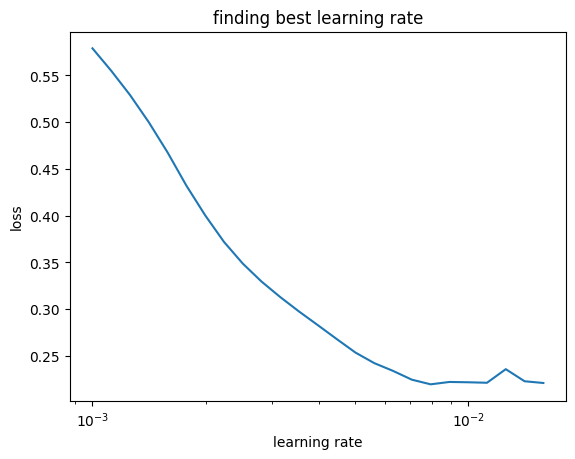

In [ ]:
# plot the ideal learning rate
lrs = 1e-3 * 10**(tf.range(25)/20)
plt.semilogx(lrs,ex_history.history['loss'])
plt.xlabel('learning rate')
plt.ylabel('loss')
plt.title('finding best learning rate')

the best learning rate falls around 0.009

In [ ]:
tf.random.set_seed(42)

# Build the model
ex_model = tf.keras.Sequential([
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(6, activation = 'relu'),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

# Compile the model
ex_model.compile(loss = tf.keras.losses.BinaryCrossentropy(),
                 optimizer = tf.keras.optimizers.Adam(lr = 0.009),
                 metrics = ['accuracy'])


# Fit the model
ex_history = ex_model.fit(X_train, y_train, epochs = 50,  validation_data = (X_test, y_test))

Epoch 1/50
25/25 [==============================] - 3s 21ms/step - loss: 0.6714 - accuracy: 0.5975 - val_loss: 0.6480 - val_accuracy: 0.6800
Epoch 2/50
25/25 [==============================] - 0s 9ms/step - loss: 0.6346 - accuracy: 0.6988 - val_loss: 0.6014 - val_accuracy: 0.8300
Epoch 3/50
25/25 [==============================] - 0s 10ms/step - loss: 0.5915 - accuracy: 0.7725 - val_loss: 0.5465 - val_accuracy: 0.8800
Epoch 4/50
25/25 [==============================] - 0s 9ms/step - loss: 0.5414 - accuracy: 0.8150 - val_loss: 0.4874 - val_accuracy: 0.9000
Epoch 5/50
25/25 [==============================] - 0s 11ms/step - loss: 0.4903 - accuracy: 0.8188 - val_loss: 0.4286 - val_accuracy: 0.9000
Epoch 6/50
25/25 [==============================] - 0s 9ms/step - loss: 0.4411 - accuracy: 0.8338 - val_loss: 0.3752 - val_accuracy: 0.9200
Epoch 7/50
25/25 [==============================] - 0s 8ms/step - loss: 0.3985 - accuracy: 0.8462 - val_loss: 0.3281 - val_accuracy: 0.9200
Epoch 8/50
25/25 

 66/313 [=====>........................] - ETA: 0s

<ipython-input-110-741dece8629d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


313/313 [==============================] - 1s 2ms/step
doing binary classification
313/313 [==============================] - 0s 2ms/step
doing binary classification


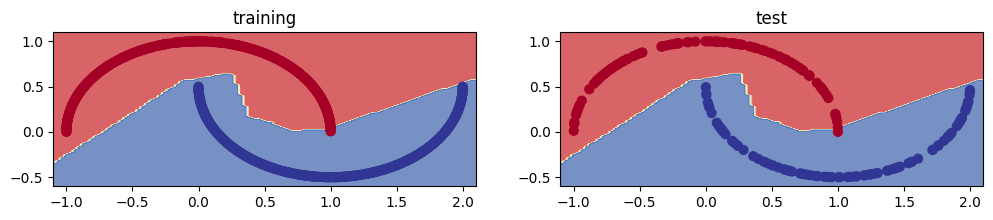

In [ ]:
plt.subplots(figsize = (12,2))

plt.subplot(1,2,1)
plt.title('training')
plot_decision_boundary(ex_model, X= X_train, y= y_train)

plt.subplot(1,2,2)
plt.title('test')
plot_decision_boundary(ex_model, X= X_test, y= y_test)
